# Analysing data and performing appropriate tests for significance

## Read data

In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

%matplotlib inline

df = pd.read_csv('../data/MOCKUP_DATA.csv', sep=';', decimal=',')

/Users/tomas/miniconda2/envs/py27_nb/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/tomas/miniconda2/envs/py27_nb/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Analysis of usage
- average number of calls, sms etc

In [2]:
df[df['SNAP_WK']<201701][['VOICE_CNT','MMS_CNT','SMS_CNT','DATA_MB', 'DATA_4G_MB','FUL_MB','FUL_PCT_USED']].mean()

VOICE_CNT         35.209287
MMS_CNT            2.114834
SMS_CNT           43.669664
DATA_MB         1321.633209
DATA_4G_MB      1149.766891
FUL_MB          8229.218446
FUL_PCT_USED    -784.065435
dtype: float64

In [3]:
df[df['SNAP_WK']>=201701][['VOICE_CNT','MMS_CNT','SMS_CNT','DATA_MB', 'DATA_4G_MB','FUL_MB','FUL_PCT_USED']].mean()

VOICE_CNT         30.524558
MMS_CNT            1.816047
SMS_CNT           41.558696
DATA_MB         1654.147999
DATA_4G_MB      1519.668266
FUL_MB          9825.723773
FUL_PCT_USED    -300.970409
dtype: float64

## Analysis of usage before and after January first
- t-test for each usage variable

In [4]:
cols = ['VOICE_CNT','MMS_CNT','SMS_CNT','DATA_MB', 'DATA_4G_MB','FUL_MB','FUL_PCT_USED']
for c in cols:
    print c
    a = df[(df['SNAP_WK']<201701) & (df[c]>0)][[c]]
    b = df[(df['SNAP_WK']>=201701) & (df[c]>0)][[c]]
    a = a.dropna()
    b = b.dropna()
    print 'u-statistic = %6.3f pvalue = %6.4f' %  stats.mannwhitneyu(a,b,use_continuity=True, alternative='two-sided')
    print a.count()[0], b.count()[0]
    print

VOICE_CNT
u-statistic = 12019148226.500 pvalue = 0.0000
91168 232588

MMS_CNT
u-statistic = 3002163375.000 pvalue = 0.0000
49952 114804

SMS_CNT
u-statistic = 10963613524.000 pvalue = 0.0000
90009 231202

DATA_MB
u-statistic = 10067245368.500 pvalue = 0.0000
91661 237953

DATA_4G_MB
u-statistic = 8269117483.500 pvalue = 0.0000
76737 223091

FUL_MB
u-statistic = 6829226425.500 pvalue = 0.0000
79256 202962

FUL_PCT_USED
u-statistic = 5712096974.000 pvalue = 0.0000
70624 190091



---
### T-test
```python
scipy.stats.ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate')
```
Calculates the T-test for the means of two independent samples of scores.

This is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values. This test assumes that the populations have identical variances by default.

We can use this test, if we observe two independent samples from the same or different population, e.g. exam scores of boys and girls or of two ethnic groups. The test measures whether the average (expected) value differs significantly across samples. If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.


In [6]:
print 't-statistic = %6.3f pvalue = %6.4f' %  stats.ttest_ind(a,b,equal_var=False)

t-statistic = -12.218 pvalue = 0.0000


---
### Mann Whitney
```python
scipy.stats.mannwhitneyu(x, y, use_continuity=True, alternative=None)
```
Computes the Mann-Whitney rank test on samples x and y.
Use only when the number of observation in each sample is > 20 and you have 2 independent samples of ranks. Mann-Whitney U is significant if the u-obtained is LESS THAN or equal to the critical value of U.

This test corrects for ties and by default uses a continuity correction.

In [7]:
print 'u-statistic = %6.3f pvalue = %6.4f' % stats.mannwhitneyu(a,b,use_continuity=True, alternative='two-sided')

u-statistic = 5712096974.000 pvalue = 0.0000


___
### KS
```python 
scipy.stats.ks_2samp(data1, data2)
```
Computes the Kolmogorov-Smirnov statistic on 2 samples.

This is a two-sided test for the null hypothesis that 2 independent samples are drawn from the same continuous distribution.

This tests whether 2 samples are drawn from the same distribution. Note that, like in the case of the one-sample K-S test, the distribution is assumed to be continuous.

This is the two-sided test, one-sided tests are not implemented. The test uses the two-sided asymptotic Kolmogorov-Smirnov distribution.

If the K-S statistic is small or the p-value is high, then we cannot reject the hypothesis that the distributions of the two samples are the same.

In [8]:
print 'K-S statistic = %6.3f pvalue = %6.4f' % stats.ks_2samp(a.values[:, 0],b.values[:, 0])

K-S statistic =  0.126 pvalue = 0.0000


## Data usage as a function of time

DATA_MB


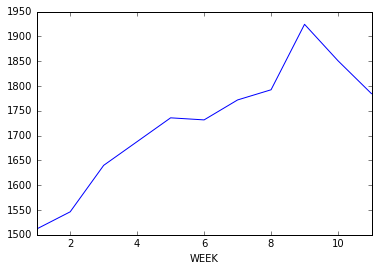

DATA_4G_MB


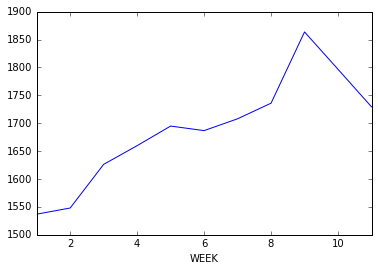

FUL_MB


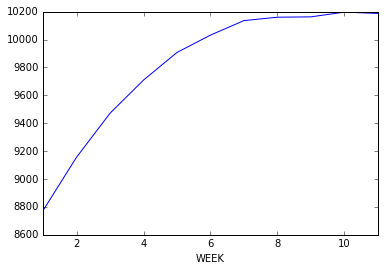

VOICE_CNT


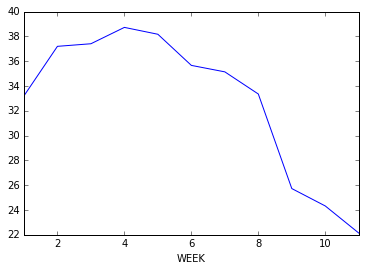

SMS_CNT


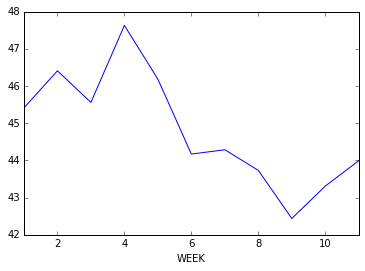

In [9]:
cols = ['DATA_MB', 'DATA_4G_MB','FUL_MB','VOICE_CNT','SMS_CNT']
df['WEEK'] = df['SNAP_WK'] - 201700
for c in cols:
    print c
    df[(df['SNAP_WK'] > 201700) & (df[c]>0)].groupby(['WEEK'])[c].mean().plot()
    plt.show()